# IT Academy - Data Science with Python
## Sprint 6: Sampling Methods
### [Github Sampling Methods](https://github.com/jesussantana/Sampling)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Sampling.svg)](https://wakatime.com/badge/github/jesussantana/Sampling)

### Exercise 1:  

  - Grab a sports-themed dataset you like. Performs a sampling of the data generating a simple random sample and a systematic sample.

In [1]:
import pandas as pd 
import numpy as np
import random
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='deep')

In [2]:
pd.set_option('display.max_columns', None)

path = '../data/'
file = 'raw/MLB.txt'

df_raw= pd.read_csv(path+file, sep='\t', engine='python')

df = df_raw.copy()

df.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


In [3]:
df.tail()

,player,team,position,salary
823,Jordan Zimmerman,Washington Nationals,Pitcher,401.0
824,Ian Desmond,Washington Nationals,Shortstop,400.0
825,Ross Detwiler,Washington Nationals,Pitcher,400.0
826,Jesse English,Washington Nationals,Pitcher,400.0
827,Willy Taveras,Washington Nationals,Outfielder,400.0


In [4]:
df.describe().round(2)

,salary
count,828.00
mean,3281.83
std,4465.45
min,400.00
25%,418.32
50%,1093.75
75%,4250.00
max,33000.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   player    828 non-null    object 
 1   team      828 non-null    object 
 2   position  828 non-null    object 
 3   salary    828 non-null    float64
dtypes: float64(1), object(3)
memory usage: 26.0+ KB


In [6]:
df.shape

(828, 4)

In [7]:
df.columns

Index(['player', 'team', 'position', 'salary'], dtype='object')

### Simple Random Sample

In [8]:
df_Sample= df.sample(frac=0.1, replace=True, random_state=1)

In [9]:
df_Sample.head()

,player,team,position,salary
37,Troy Glaus,Atlanta Braves,First Baseman,1750.0
235,Randy Flores,Colorado Rockies,Pitcher,650.0
72,Felix Pie,Baltimore Orioles,Outfielder,420.0
767,Eric Hurley,Texas Rangers,Pitcher,401.0
715,Rafael Soriano,Tampa Bay Rays,Pitcher,7250.0


In [10]:
df_Sample.shape

(83, 4)

In [11]:
df_Sample[df_Sample['salary'] == df_Sample['salary'].max()]

,player,team,position,salary
497,Mark Teixeira,New York Yankees,First Baseman,20625.0


In [12]:
df_Sample[df_Sample['salary'] == df_Sample['salary'].min()].head()

,player,team,position,salary
215,Hector Ambriz,Cleveland Indians,Pitcher,400.0
25,Jordan Norberto,Arizona Diamondbacks,Pitcher,400.0
707,Allen Craig,St. Louis Cardinals,Third Baseman,400.0
381,Chris Pettit,Los Angeles Angeles,Outfielder,400.0


Text(0.5, 0, 'SAMPLE - Salary (millions of dollars)')

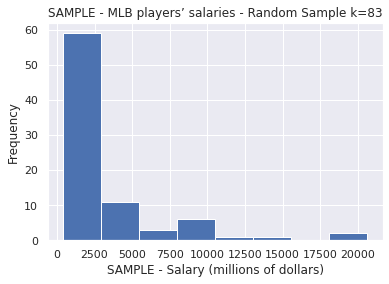

In [13]:
k = int(np.ceil(1+np.log2(len(df_Sample))))  # Sturges Rule

plt.hist(df_Sample['salary'], bins= k)
plt.title(f"SAMPLE - MLB players’ salaries - Random Sample k={len(df_Sample)}")
plt.ylabel('Frequency')
plt.xlabel('SAMPLE - Salary (millions of dollars)')

Text(0.5, 0, 'SAMPLE - Salary (millions of dollars)')

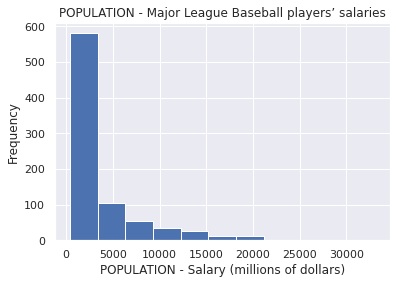

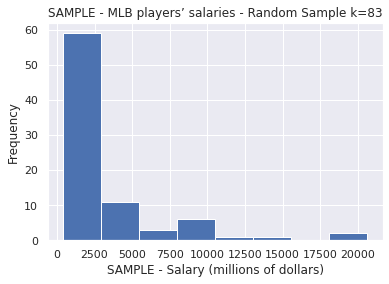

In [16]:
#fig = plt.figure(figsize=(14,4))

ax1 = fig.add_subplot(2, 1, 1)
k1 = int(np.ceil(1+np.log2(len(df))))
# Plot
ax1 = df.hist(['salary'], bins=k1)
plt.title('POPULATION - Major League Baseball players’ salaries')
plt.ylabel('Frequency')
plt.xlabel('POPULATION - Salary (millions of dollars)')

ax2 = fig.add_subplot(2, 1, 2)

# Plot
ax2 = df_Sample.hist(['salary'], bins=k)
plt.title(f"SAMPLE - MLB players’ salaries - Random Sample k={len(df_Sample)}")
plt.ylabel('Frequency')
plt.xlabel('SAMPLE - Salary (millions of dollars)')

Text(0.5, 0, 'Salary (millions of dollars)')

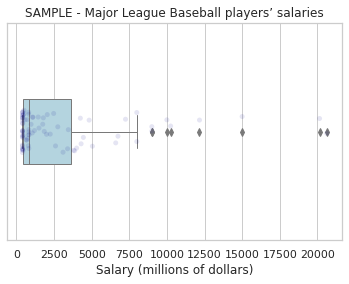

In [17]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_Sample["salary"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(x=df_Sample["salary"], orient='v', color='darkblue', alpha=0.1)
plt.title('SAMPLE - Major League Baseball players’ salaries')
plt.xlabel('Salary (millions of dollars)')

Text(0.5, 0, 'SAMPLE - Salary (millions of dollars) - Random Sample k=83')

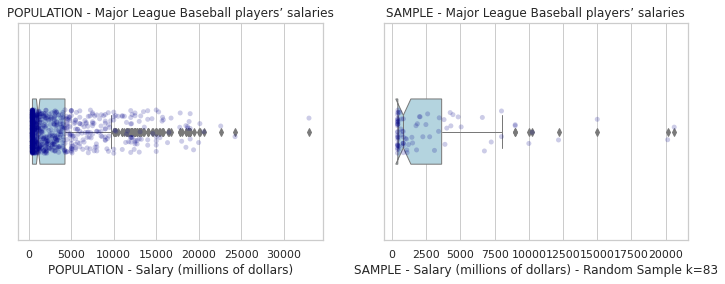

In [18]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(1, 2, 1)

# Plot
sns.set(style="whitegrid")
ax1 = sns.boxplot(x=df["salary"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax1 = sns.stripplot(x=df["salary"], orient='v', color='darkblue', alpha=0.2)
plt.title('POPULATION - Major League Baseball players’ salaries')
plt.xlabel('POPULATION - Salary (millions of dollars)')

ax2 = fig.add_subplot(1, 2, 2)

# Plot
sns.set(style="whitegrid")
ax2 = sns.boxplot(x=df_Sample["salary"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax2 = sns.stripplot(x=df_Sample["salary"], orient='v', color='darkblue', alpha=0.2)
plt.title('SAMPLE - Major League Baseball players’ salaries')
plt.xlabel(f'SAMPLE - Salary (millions of dollars) - Random Sample k={len(df_Sample)}')

In [19]:
df_Sample.head()

,player,team,position,salary
37,Troy Glaus,Atlanta Braves,First Baseman,1750.0
235,Randy Flores,Colorado Rockies,Pitcher,650.0
72,Felix Pie,Baltimore Orioles,Outfielder,420.0
767,Eric Hurley,Texas Rangers,Pitcher,401.0
715,Rafael Soriano,Tampa Bay Rays,Pitcher,7250.0


### Stratified Random Sampling

In [20]:
df_Stratified = df.groupby('position', group_keys = True).apply(pd.DataFrame.sample, frac=.1)
df_Stratified.head()

player               team position  salary
position                                                          
Catcher  159        Donny Lucy  Chicago White Sox  Catcher  400.00
         195      Mike Redmond  Cleveland Indians  Catcher  850.00
         762  Taylor Teagarden      Texas Rangers  Catcher  407.01
         488       Rod Barajas      New York Mets  Catcher  500.00
         486      Henry Blanco      New York Mets  Catcher  750.00

In [21]:
type(df_Stratified)

pandas.core.frame.DataFrame

In [22]:
df_Stratified.describe().round()


,salary
count,84.0
mean,3825.0
std,4856.0
min,400.0
25%,413.0
50%,1125.0
75%,5062.0
max,20625.0


In [23]:
df_Stratified.position.unique()

array(['Catcher', 'Designated Hitter', 'First Baseman', 'Outfielder',
       'Pitcher', 'Second Baseman', 'Shortstop', 'Third Baseman'],
      dtype=object)

In [24]:
df_Stratified.shape

(84, 4)

In [25]:
df_Stratified.salary.mean().round(2)

3825.43